## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Read CSV

In [2]:
df = pd.read_csv("./buttonslog.csv", encoding="Latin-1", sep=",")
df

,Time,Button,volume_dial_position,device_state
0,2021-04-16 09:33:55.133462,Volume,23.0,False
1,2021-04-16 09:33:55.203894,Volume,23.0,False
2,2021-04-16 09:33:59.084621,Device ON,NaN,True
3,2021-04-16 09:33:59.089593,Sixties,NaN,True
4,2021-04-16 09:33:59.392622,Volume,23.0,True
...,...,...,...,...
423,2021-04-16 10:44:31.072594,Volume,23.0,True
424,2021-04-16 10:44:31.133785,Volume,20.0,True
425,2021-04-16 10:44:31.229245,Volume,20.0,True
426,2021-04-16 10:44:31.290269,Volume,17.0,True


<AxesSubplot:title={'center':'Gespeelde kanalen'}>

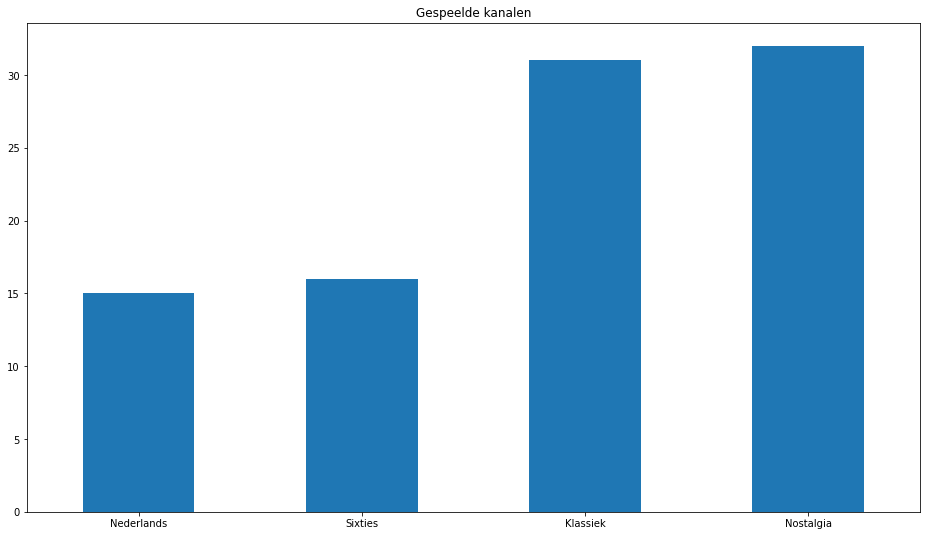

In [3]:
clean = df
clean = clean[clean.Button != 'Device OFF']
clean = clean[clean.Button != 'Device ON']
clean = clean[clean.Button != 'Volume']
clean.Button.value_counts().sort_values().plot(kind = 'bar', rot=0, figsize=(16,9), title="Gespeelde kanalen")

In [4]:
df['Time'] = df['Time'].str[:16]
df["time_counts"] = df["Time"].value_counts()
df['time_counts'] = df.groupby('Time')['Time'].transform('count')

In [5]:
filtered_data = df[df["time_counts"] > 20]
times_filtered = filtered_data['time_counts'].unique()
time_filtered = filtered_data['Time'].unique()

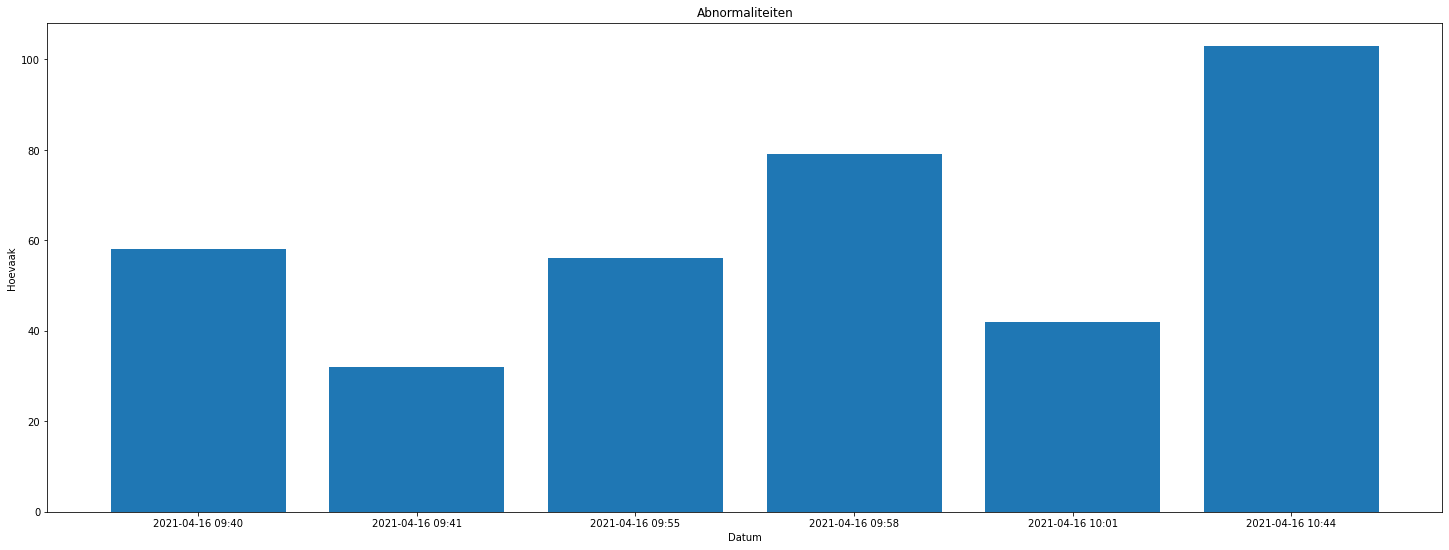

In [6]:
# zet de size van de grafiek correct
plt.figure(figsize = (25,9))

# label de grafiek
plt.title('Abnormaliteiten')
plt.xlabel('Datum')
plt.ylabel('Hoevaak')

maxAmount = 20
plt.bar(time_filtered[-maxAmount:], times_filtered[-maxAmount:])
plt.show()

<AxesSubplot:title={'center':'Weergave interactie aan of uit Oradio'}>

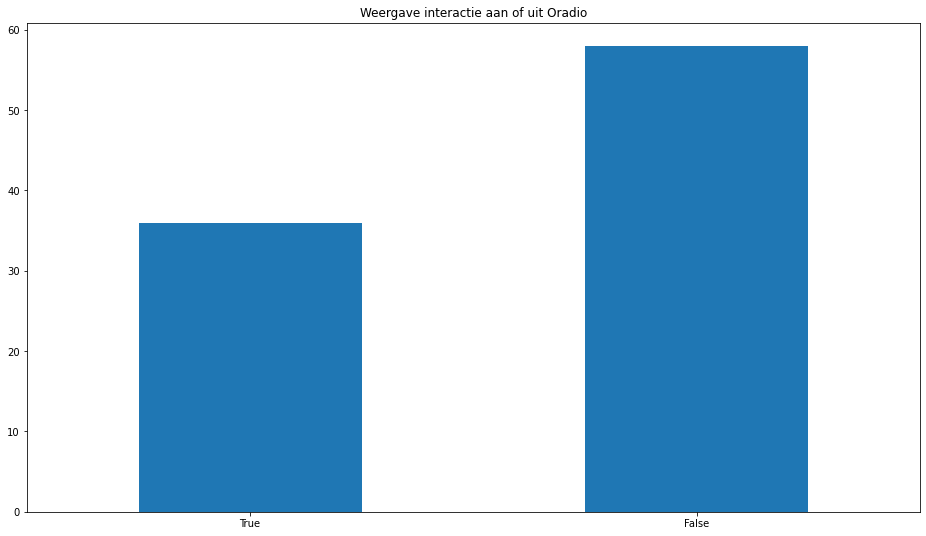

In [7]:

clean.device_state.value_counts().sort_values().plot(kind = 'bar', rot=0, figsize=(16,9), title="Weergave interactie aan of uit Oradio")